<a href="https://colab.research.google.com/github/Giffy/AI_Intro-to-Machine-Learning/blob/master/Session-5/PCA_step_by_step_Irises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Principal component analysis (PCA)** is a dimension reduction technique that enables to identify correlations and patterns in a dataset so it can be transformed into a dataset of significant lower dimensions and keeping the most relevant information.

This notebook explains the key steps of PCA 

In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset preparation

Loading and analyzing the iris flowers dataset.

In [48]:
iris_dataset = pd.read_csv('https://raw.githubusercontent.com/Giffy/AI_Intro-to-Machine-Learning/master/Session-5/Datasets/iris.data.zip', header=None)
iris_dataset.columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'label']
iris_dataset.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


# Principal Component Analysis (step by step)


### 1 Standardize the data
We need to standatize the data because the PCA's output is influenced based on the scale of the features of the data.

In [0]:
features = iris_dataset.columns.to_list()[:4]
x = iris_dataset.loc[:, features]
x = x[:].replace(np.nan,0 , regex=True)                         # Replaces all null values to 0, if any
x = x.values                         
x_std = StandardScaler().fit_transform(x)                       # Performs standarization of the dataset

In [50]:
x_std.shape

(150, 4)

### 2 Building the covanciance matrix.

In [93]:
mean_vec = np.mean(x_std, axis=0)
cov_mat = (x_std - mean_vec).T.dot((x_std - mean_vec)) / (x_std.shape[0]-1)
print('Covariance matrix \n {}'.format(cov_mat))

Covariance matrix 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


Visualization of covariance matrix

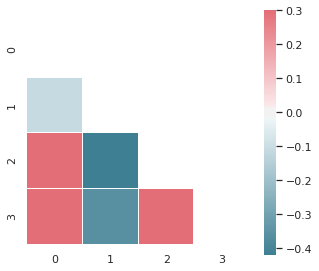

In [52]:
sns.set(style="white")

df = pd.DataFrame(x_std)
corr = df.corr()                                     # Compute the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=np.bool))    # Generate a mask for the upper triangle
f, ax = plt.subplots(figsize=(5, 9))                 # Set up the matplotlib figure size
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### 3 Calculate eigendecomposition on covariance matrix

In [92]:
cov_mat = np.cov(x_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n {}'.format(eig_vecs))
print('\nEigenvalues \n {}'.format(eig_vals))

Eigenvectors 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
 [2.93035378 0.92740362 0.14834223 0.02074601]


Visually confirm that the list is correctly sorted by decreasing eigenvalues.

The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.

In [76]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print('Eigenvalues in descending order:')
for i in eig_pairs:
  print(i[0])

Eigenvalues in descending order:
2.930353775589317
0.9274036215173419
0.14834222648163944
0.02074601399559593


### 4 Compute principal components

In [62]:
# Explained variance
pca = PCA(n_components=2).fit(x_std)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.72770452 0.23030523]


<function matplotlib.pyplot.show>

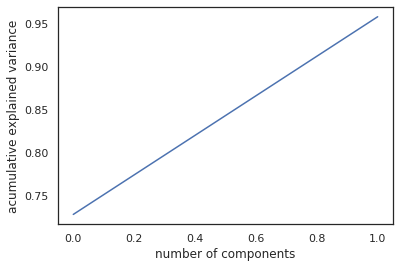

In [63]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('acumulative explained variance')
plt.show

### 5 Reduce teh data dimensions

In [64]:
x_pca = pca.transform(x_std)
x_pca.shape

(150, 2)

We've reduced 4 dimensions to 2 dimensions

###6 PCA dataset visualization

In [72]:
df_pca = pd.DataFrame(data = x_pca
             , columns = ['principal component 1', 'principal component 2'])
df_pca.tail()

,principal component 1,principal component 2
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362
149,0.959299,-0.022284


<Figure size 432x288 with 0 Axes>

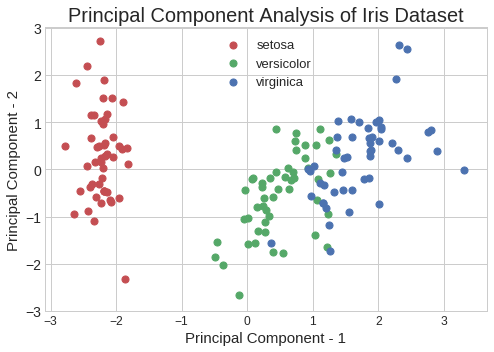

In [90]:
with plt.style.context('seaborn-whitegrid'):
  plt.figure()
  plt.figure(figsize=(7,5))
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=14)
  plt.xlabel('Principal Component - 1',fontsize=15)
  plt.ylabel('Principal Component - 2',fontsize=15)
  plt.title("Principal Component Analysis of Iris Dataset",fontsize=20)
  targets = iris_dataset['label'].unique()
  colors = ['r', 'g', 'b']
  for target, color in zip(targets,colors):
      indicesToKeep = iris_dataset['label'] == target
      plt.scatter(df_pca.loc[indicesToKeep, 'principal component 1'],
                  df_pca.loc[indicesToKeep, 'principal component 2'], 
                  c = color, s = 50)
  plt.legend(targets,prop={'size': 13}, loc='upper center')
  plt.tight_layout()
  plt.show()